# CrowdTruth for Sparse Multiple Choice Tasks: Event Extraction

In [1]:
import pandas as pd

file_name = "f1321547_things_nomotivation"
test_data = pd.read_csv("../../data/pilot_crowd_data/raw_data/" + file_name + ".csv")
test_data.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,...,events_count,gold_total_events,hiddeninput_gold,lowercase_sentence,original_sentence,processed_sentence,selectedtags_desc_gold,sentence,sentence_id,tokens
0,2015652237,11/18/2018 08:19:50,4258989155,11/18/2018 08:19:23,False,clixsense,1,623fdeab4ddd1aa6449bfd3e99c650df,GBR,NaN,...,NaN,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
1,2015652237,11/18/2018 08:44:21,4259017881,11/18/2018 08:44:05,False,wannads,1,017bbee01ff77eadfca65e4067b36da3,GBR,H7,...,NaN,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
2,2015652237,11/18/2018 11:33:00,4259214892,11/18/2018 11:32:38,False,elite,1,19d1cf4672a44a2b873901990979111a,USA,TX,...,NaN,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
3,2015652237,11/18/2018 15:29:56,4259580708,11/18/2018 15:29:39,False,prodege,1,d8d245c91422aa1ee8390a5faf482603,GBR,C9,...,NaN,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
4,2015652237,11/18/2018 15:42:49,4259605986,11/18/2018 15:41:43,False,instagc,1,1f2407ac6926cfdf579fa829a88c1d86,USA,AL,...,NaN,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [2]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Relation Extraction task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`annotation_separator`:** string that separates between the crowd annotations in `outputColumns`
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of all relations that were given as input to the crowd in at least one sentence
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [3]:
class TestConfig(DefaultConfig):
    inputColumns = ["doc_id", "total_events_gold", "sentence", "lowercase_sentence", "sentence_id", "all_runs_events"]
    outputColumns = ["selectedtags_desc"]
    
    annotation_separator = ","
        
    # processing of a closed task
    open_ended_task = True
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
            # remove square brackets from annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('[',''))
            judgments[col] = judgments[col].apply(lambda x: str(x).replace(']',''))
            # remove the quotes around the annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('"',''))
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [4]:
data_open, config = crowdtruth.load(
    file = "../../data/pilot_crowd_data/raw_data/" + file_name + ".csv",
    config = TestConfig()
)

data_open['judgments'].head()

,output.selectedtags_desc,output.selectedtags_desc.count,output.selectedtags_desc.unique,unit,worker,started,submitted,duration,job
judgment,,,,,,,,,
4258989155,"{'informed__37__45': 1, 'campaign__266__274': 1}",2,2,2015652237,623fdeab4ddd1aa6449bfd3e99c650df,2018-11-18 08:19:23,2018-11-18 08:19:50,27,../../data/pilot_crowd_data/raw_data/f1321547_...
4259017881,{'abused__113__119': 1},1,1,2015652237,017bbee01ff77eadfca65e4067b36da3,2018-11-18 08:44:05,2018-11-18 08:44:21,16,../../data/pilot_crowd_data/raw_data/f1321547_...
4259214892,"{'informed__37__45': 1, 'abused__113__119': 1}",2,2,2015652237,19d1cf4672a44a2b873901990979111a,2018-11-18 11:32:38,2018-11-18 11:33:00,22,../../data/pilot_crowd_data/raw_data/f1321547_...
4259580708,"{'informed__37__45': 1, 'face__69__73': 1, 'in...",5,5,2015652237,d8d245c91422aa1ee8390a5faf482603,2018-11-18 15:29:39,2018-11-18 15:29:56,17,../../data/pilot_crowd_data/raw_data/f1321547_...
4259605986,"{'informed__37__45': 1, 'face__69__73': 1, 'in...",4,4,2015652237,1f2407ac6926cfdf579fa829a88c1d86,2018-11-18 15:41:43,2018-11-18 15:42:49,66,../../data/pilot_crowd_data/raw_data/f1321547_...


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [5]:
results_open = crowdtruth.run(data_open, config)

`results` is a dict object that contains the quality metrics for sentences, events and crowd workers.

The **sentence metrics** are stored in `results["units"]`:

In [6]:
results_open["units"].head()

,duration,input.all_runs_events,input.doc_id,input.lowercase_sentence,input.sentence,input.sentence_id,job,output.selectedtags_desc,output.selectedtags_desc.annotations,output.selectedtags_desc.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,,
2015652237,41.45,informed__37__45###face__69__73###investigatio...,nyt_20130321_sarkozy,former president nicolas sarkozy was informed ...,Former President Nicolas Sarkozy was informed ...,0,../../data/pilot_crowd_data/raw_data/f1321547_...,"{'informed__37__45': 17, 'campaign__266__274':...",76,6,20,0.668743,"{'informed__37__45': 0.8946067038350854, 'camp...",0.625944,"{'informed__37__45': 0.85, 'campaign__266__274..."
2015652238,55.60,denied__16__22###accepting__23__32###alleged__...,nyt_20130321_sarkozy,mr. sarkozy has denied accepting illegal campa...,Mr. Sarkozy has denied accepting illegal campa...,1,../../data/pilot_crowd_data/raw_data/f1321547_...,"{'denied accepting__16__32': 11, 'campaign__41...",46,5,20,0.489715,{'denied accepting__16__32': 0.557251894143286...,0.444478,"{'denied accepting__16__32': 0.55, 'campaign__..."
2015652239,36.75,called__41__47###decision__61__69###indicates_...,nyt_20130321_sarkozy,"mr. sarkozy s lawyer , thierry herzog , called...","Mr. Sarkozy 's lawyer , Thierry Herzog , calle...",2,../../data/pilot_crowd_data/raw_data/f1321547_...,"{'called__41__47': 14, 'indicates__78__87': 11...",70,6,20,0.600058,"{'called__41__47': 0.7857993383346975, 'indica...",0.541097,"{'called__41__47': 0.7, 'indicates__78__87': 0..."
2015652240,21.30,said__11__15###appeal__25__31###appeal .__25__33,nyt_20130321_sarkozy,the lawyer said he would appeal 0,The lawyer said he would appeal .,3,../../data/pilot_crowd_data/raw_data/f1321547_...,"{'said__11__15': 16, 'appeal__25__31': 15, 'ap...",37,3,20,0.700588,"{'said__11__15': 0.8295543011824428, 'appeal__...",0.676423,"{'said__11__15': 0.8, 'appeal__25__31': 0.75, ..."
2015652241,41.35,ruling__4__10###mean__32__36###lost__60__64###...,nyt_20130321_sarkozy,the ruling does not necessarily mean that mr. ...,The ruling does not necessarily mean that Mr. ...,4,../../data/pilot_crowd_data/raw_data/f1321547_...,"{'stand__156__161': 12, 'lost__60__64': 14, 'r...",60,6,20,0.596438,"{'stand__156__161': 0.5873619548516986, 'lost_...",0.563330,"{'stand__156__161': 0.6, 'lost__60__64': 0.7, ..."


The `uqs` column in `results["units"]` contains the **sentence quality scores**, capturing the overall workers agreement over each sentence. Here we plot its histogram:

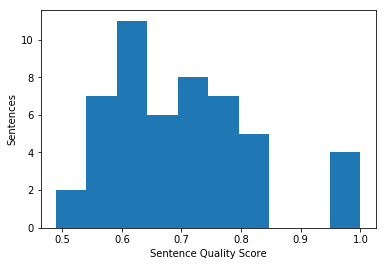

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(results_open["units"]["uqs"])
plt.xlabel("Sentence Quality Score")
plt.ylabel("Sentences")


The `unit_annotation_score` column in `results["units"]` contains the **sentence-relation scores**, capturing the likelihood that a relation is expressed in a sentence. For each sentence, we store a dictionary mapping each relation to its sentence-relation score.

In [8]:
results_open["units"]["unit_annotation_score"].head(10)

unit
2015652237    {'informed__37__45': 0.8946067038350854, 'camp...
2015652238    {'denied accepting__16__32': 0.557251894143286...
2015652239    {'called__41__47': 0.7857993383346975, 'indica...
2015652240    {'said__11__15': 0.8295543011824428, 'appeal__...
2015652241    {'stand__156__161': 0.5873619548516986, 'lost_...
2015652242    {'accused__23__30': 0.8997926608884879, 'fakin...
2015652243    {'reported__57__65': 0.9174439524523865, 'miss...
2015652244    {'search__31__37': 0.7865522808128919, 'said__...
2015652245    {'pulled__32__38': 0.819355852437829, 'showed_...
2015652246    {'said__139__143': 0.7195814733899851, 'wanted...
Name: unit_annotation_score, dtype: object

The **worker metrics** are stored in `results["workers"]`:

In [9]:
results_open["workers"].head()

,unit,judgment,job,duration,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
017bbee01ff77eadfca65e4067b36da3,50,50,1,16.080000,0.308935,0.522193,0.591610,0.275125,0.484723,0.567592
07fe811ad57531a29d0ce82daedb4ad7,44,44,1,169.727273,0.469287,0.634527,0.739585,0.428640,0.593352,0.722405
0d9bdc31b5837ca4dbf0a99ba7add9b5,3,3,1,46.333333,0.418243,0.568113,0.736197,0.395556,0.538534,0.734505
19d1cf4672a44a2b873901990979111a,50,50,1,27.780000,0.435904,0.615470,0.708246,0.401535,0.579911,0.692409
1f2407ac6926cfdf579fa829a88c1d86,50,50,1,71.660000,0.638035,0.743546,0.858097,0.592079,0.700653,0.845039


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

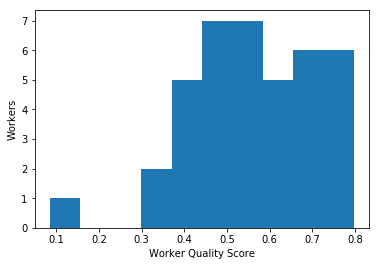

In [10]:
plt.hist(results_open["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

## Save crowd results in a csv file

In [11]:
rows = []
header = list(results_open["units"])
header.extend(["validated_event", "no_of_annotations", "validated_event_final_score", "validated_event_initial_score"])

rows.append(header)

for i in range(len(results_open["units"].index)):
    keys = []
    all_event_runs = results_open["units"]["input.all_runs_events"].iloc[i].lower().split("###")
    keys.extend(all_event_runs)
    keys.append("no_event")
    
    for j in range(len(keys)):
        row = list(results_open["units"].iloc[i])
        row.append(keys[j])
        row.append(results_open["units"]["output.selectedtags_desc"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score_initial"].iloc[i][keys[j].lower()])
    
        rows.append(row)
        
        
import csv

with open('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

## Comparison with Expert Annotations

In [12]:
# expert annotations in TempEval-3 Platinum dataset
import numpy as np
           
expert_data = pd.read_csv("../../data/TempEval3-data/TE3-Platinum_events.csv")
crowd_data = pd.read_csv("../../data/pilot_crowd_data/results/"+ file_name + "_units_open.csv")
crowd_data["Experts"] = pd.Series(np.random.randn(len(crowd_data.index)), index=crowd_data.index)

for i in range(len(crowd_data.index)):
    subset = expert_data[(expert_data["Doc Id"].str.lower() == crowd_data["input.doc_id"].iloc[i].lower()) & (expert_data["Sentence Id"] == crowd_data["input.sentence_id"].iloc[i])]# & (str(str(expert_data["Lowercase Token"]) + "__" + str(expert_data["Start Offset"]) + "__" + str(expert_data["End Offset"])) == str(crowd_data["validated_event"].iloc[i]))]
    found = False
    for j in range(len(subset.index)):
        if str(str(subset["Lowercase Token"].iloc[j]) + "__" + str(subset["Start Offset"].iloc[j]) + "__" + str(subset["End Offset"].iloc[j])) == crowd_data["validated_event"].iloc[i]:
            found = True
    if found == True:
        crowd_data["Experts"].iloc[i] = 1
    else:
        crowd_data["Experts"].iloc[i] = 0
crowd_data.to_csv("../../data/pilot_crowd_data/results/" + file_name + "_units_open.csv", index=False)    


/Users/oanainel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
import eval_crowd_results as eval_script
import pandas as pd
import csv
crowd = pd.read_csv('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv')
eval_file = eval_script.compute_crowd_performance(crowd, "validated_event_final_score")
     
with open('../../data/pilot_crowd_data/results/eval_' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(eval_file)
    
eval_main = pd.read_csv("../../data/pilot_crowd_data/results/eval_" + file_name + "_units_open.csv")
eval_main

,Thresh,TP,TN,FP,FN,Precision,Recall,Accuracy,F1-score
0,0.05,162,48,51,0,0.760563,1.000000,0.804598,0.864000
1,0.10,161,51,48,1,0.770335,0.993827,0.812261,0.867925
2,0.15,161,53,46,1,0.777778,0.993827,0.819923,0.872629
3,0.20,158,56,43,4,0.786070,0.975309,0.819923,0.870523
4,0.25,158,59,40,4,0.797980,0.975309,0.831418,0.877778
5,0.30,158,63,36,4,0.814433,0.975309,0.846743,0.887640
6,0.35,157,66,33,5,0.826316,0.969136,0.854406,0.892045
7,0.40,154,71,28,8,0.846154,0.950617,0.862069,0.895349
8,0.45,145,75,24,17,0.857988,0.895062,0.842912,0.876133
9,0.50,137,77,22,25,0.861635,0.845679,0.819923,0.853583
